#NAME: RAVI YADAV


In [125]:
!pip install statsmodels --upgrade
!pip install pmdarima

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.12.2)


In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#from plotly.offline import plot, init_notebook_mode
#init_notebook_mode()
#import cufflinks as cf
#%matplotlib inline
#cf.set_config_file(offline=True)

df=pd.read_csv("/content/drive/MyDrive/stocks.csv" )
df["Date"] = pd.to_datetime(df['Date'],format="%Y-%m-%d")

In [127]:
df.index=df['Date']

In [128]:
df=df.drop('Date',axis=1)

In [129]:
df.columns

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500'], dtype='object')

In [130]:
df.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [131]:
df.shape

(2159, 9)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2159 entries, 2012-01-12 to 2020-08-11
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2159 non-null   float64
 1   BA      2159 non-null   float64
 2   T       2159 non-null   float64
 3   MGM     2159 non-null   float64
 4   AMZN    2159 non-null   float64
 5   IBM     2159 non-null   float64
 6   TSLA    2159 non-null   float64
 7   GOOG    2159 non-null   float64
 8   sp500   2159 non-null   float64
dtypes: float64(9)
memory usage: 168.7 KB


Since all the features are float and only Date coulumn is converted to Datetime, also there is no missing values.

In [133]:
df.isnull().sum()

AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [134]:
df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


##Univariate Anylasis

In [135]:
df['AAPL'].mean()

140.81982259008825

In [136]:
df['AAPL'].median()

116.599998

##Checking For the outliers in the stock price

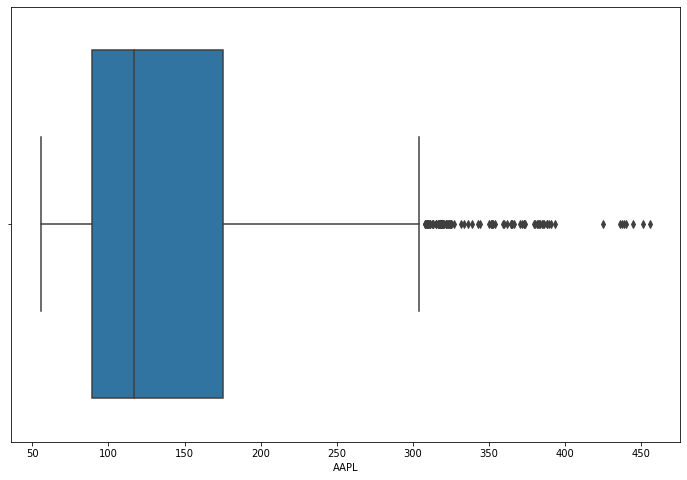

In [137]:
sns.boxplot(x=df.AAPL)

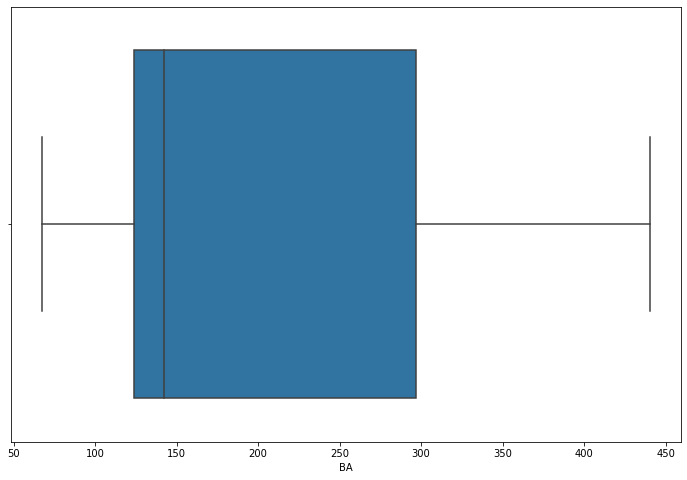

In [138]:
sns.boxplot(x=df.BA)

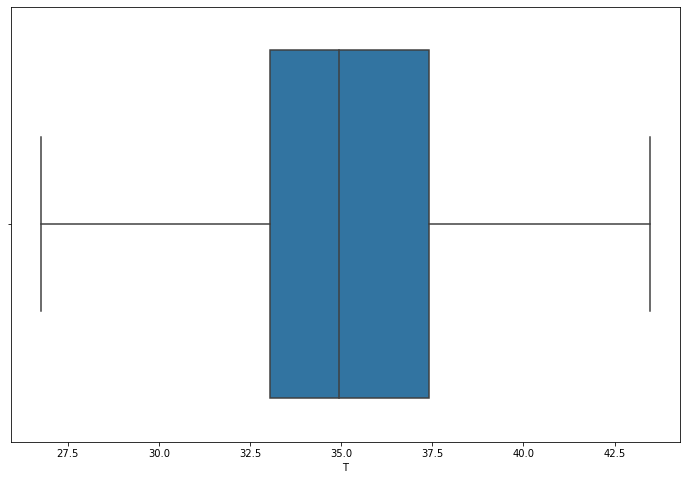

In [139]:
sns.boxplot(x=df['T'])

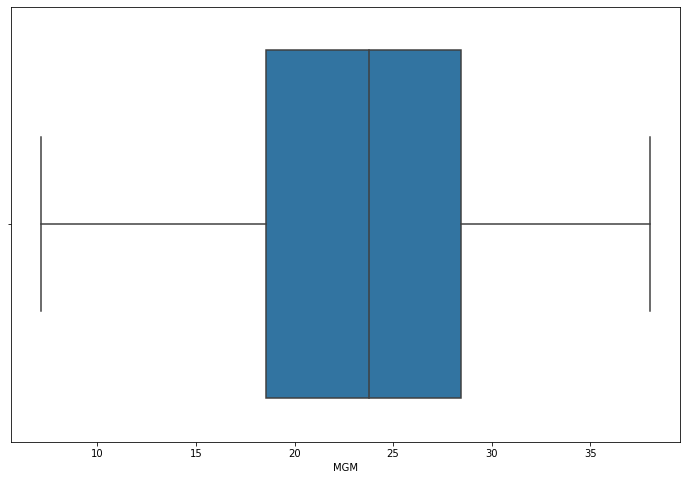

In [140]:
sns.boxplot(x=df.MGM)

###'MGM' has the lowest Stock Price comparing to all other companies with mean of 23.10.

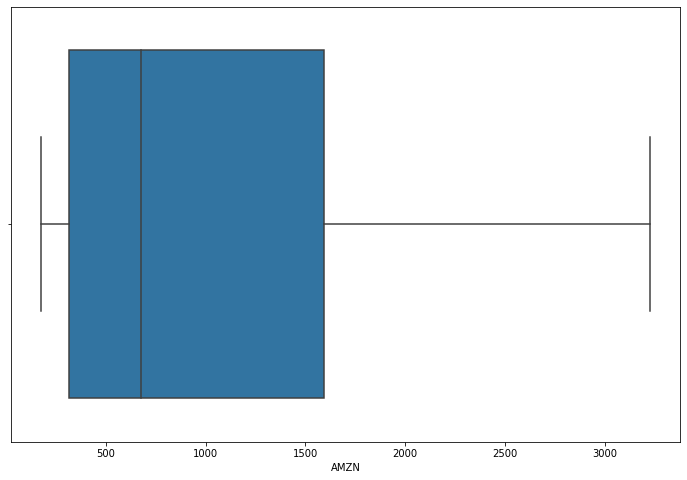

In [141]:
sns.boxplot(x=df.AMZN)

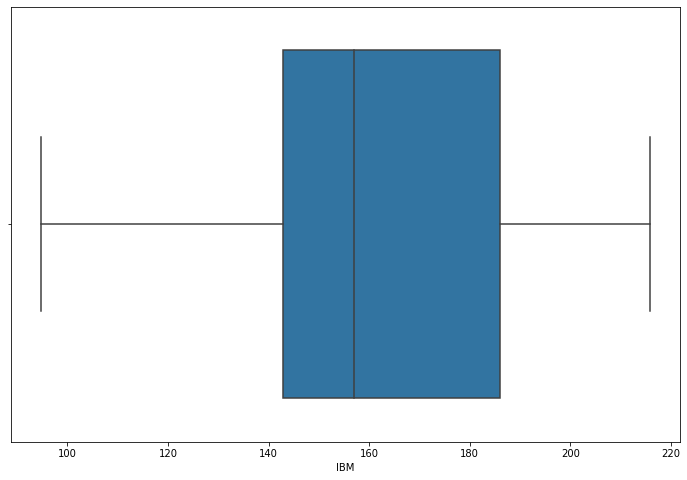

In [142]:
sns.boxplot(x=df.IBM)

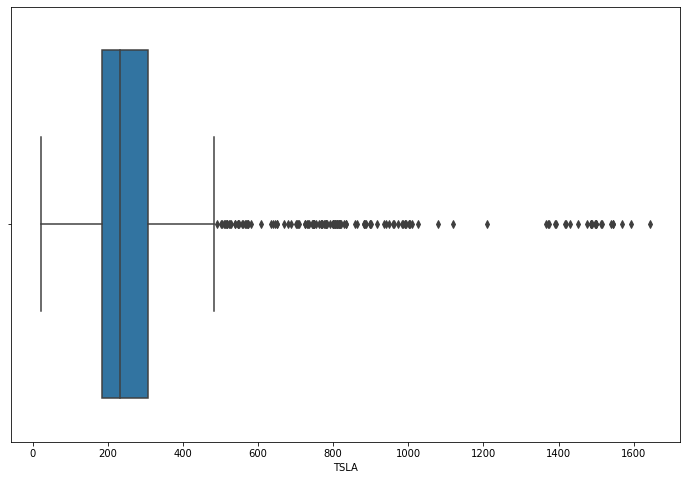

In [143]:
sns.boxplot(x=df.TSLA)

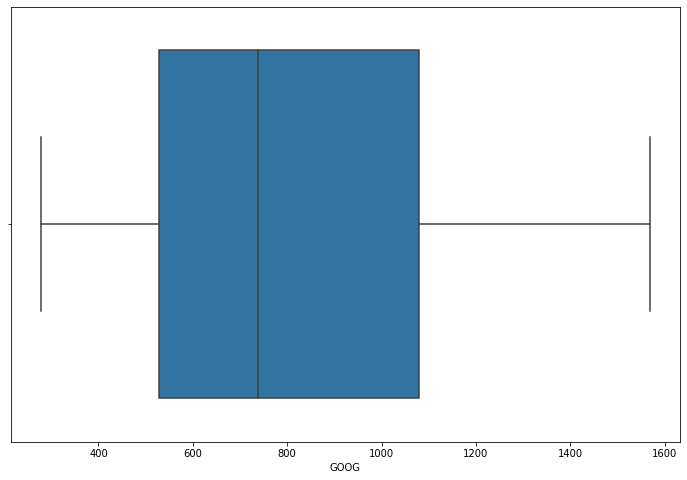

In [144]:
sns.boxplot(x=df.GOOG)

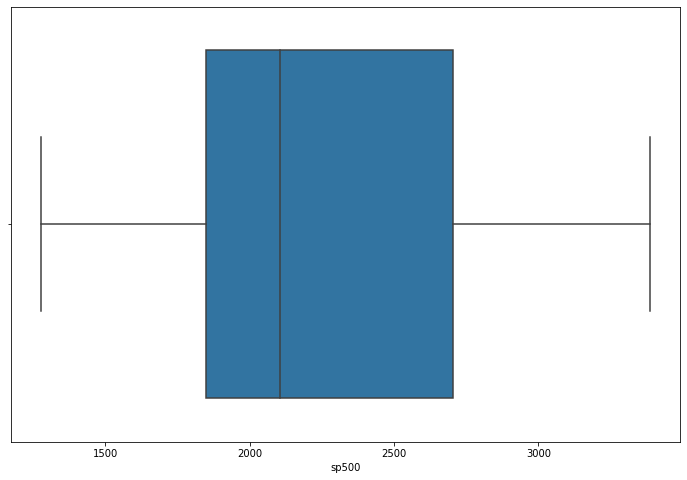

In [145]:
sns.boxplot(x=df.sp500)

###This company has the highest Stock price this may tell us the company is booming.

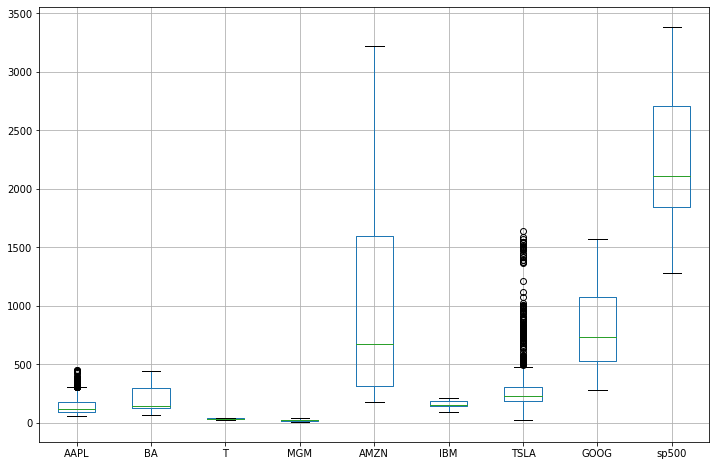

In [146]:
#Checking for The Outliers along with different features
df.boxplot()

###From the above plots we can infer that The company 'AAPL' and 'TSLA' have so much outliers this means that the stock prices for these companies are changing quit frequent where as if we talk about other companies the there is no outlier which means that the company is quit stable.


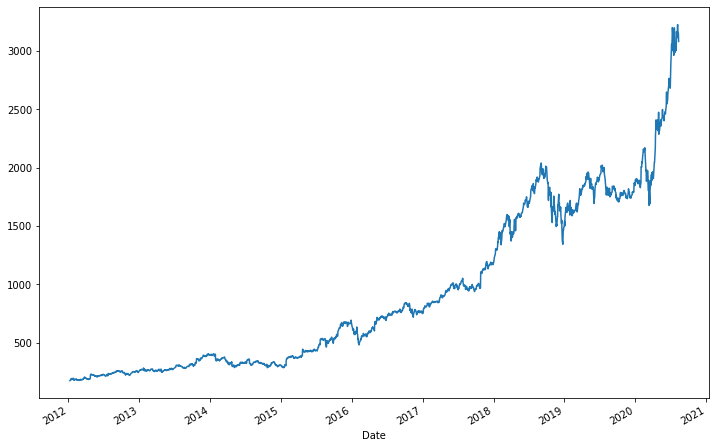

In [147]:
df['AMZN'].plot(figsize=(12,8))

#Bivariate anylasis

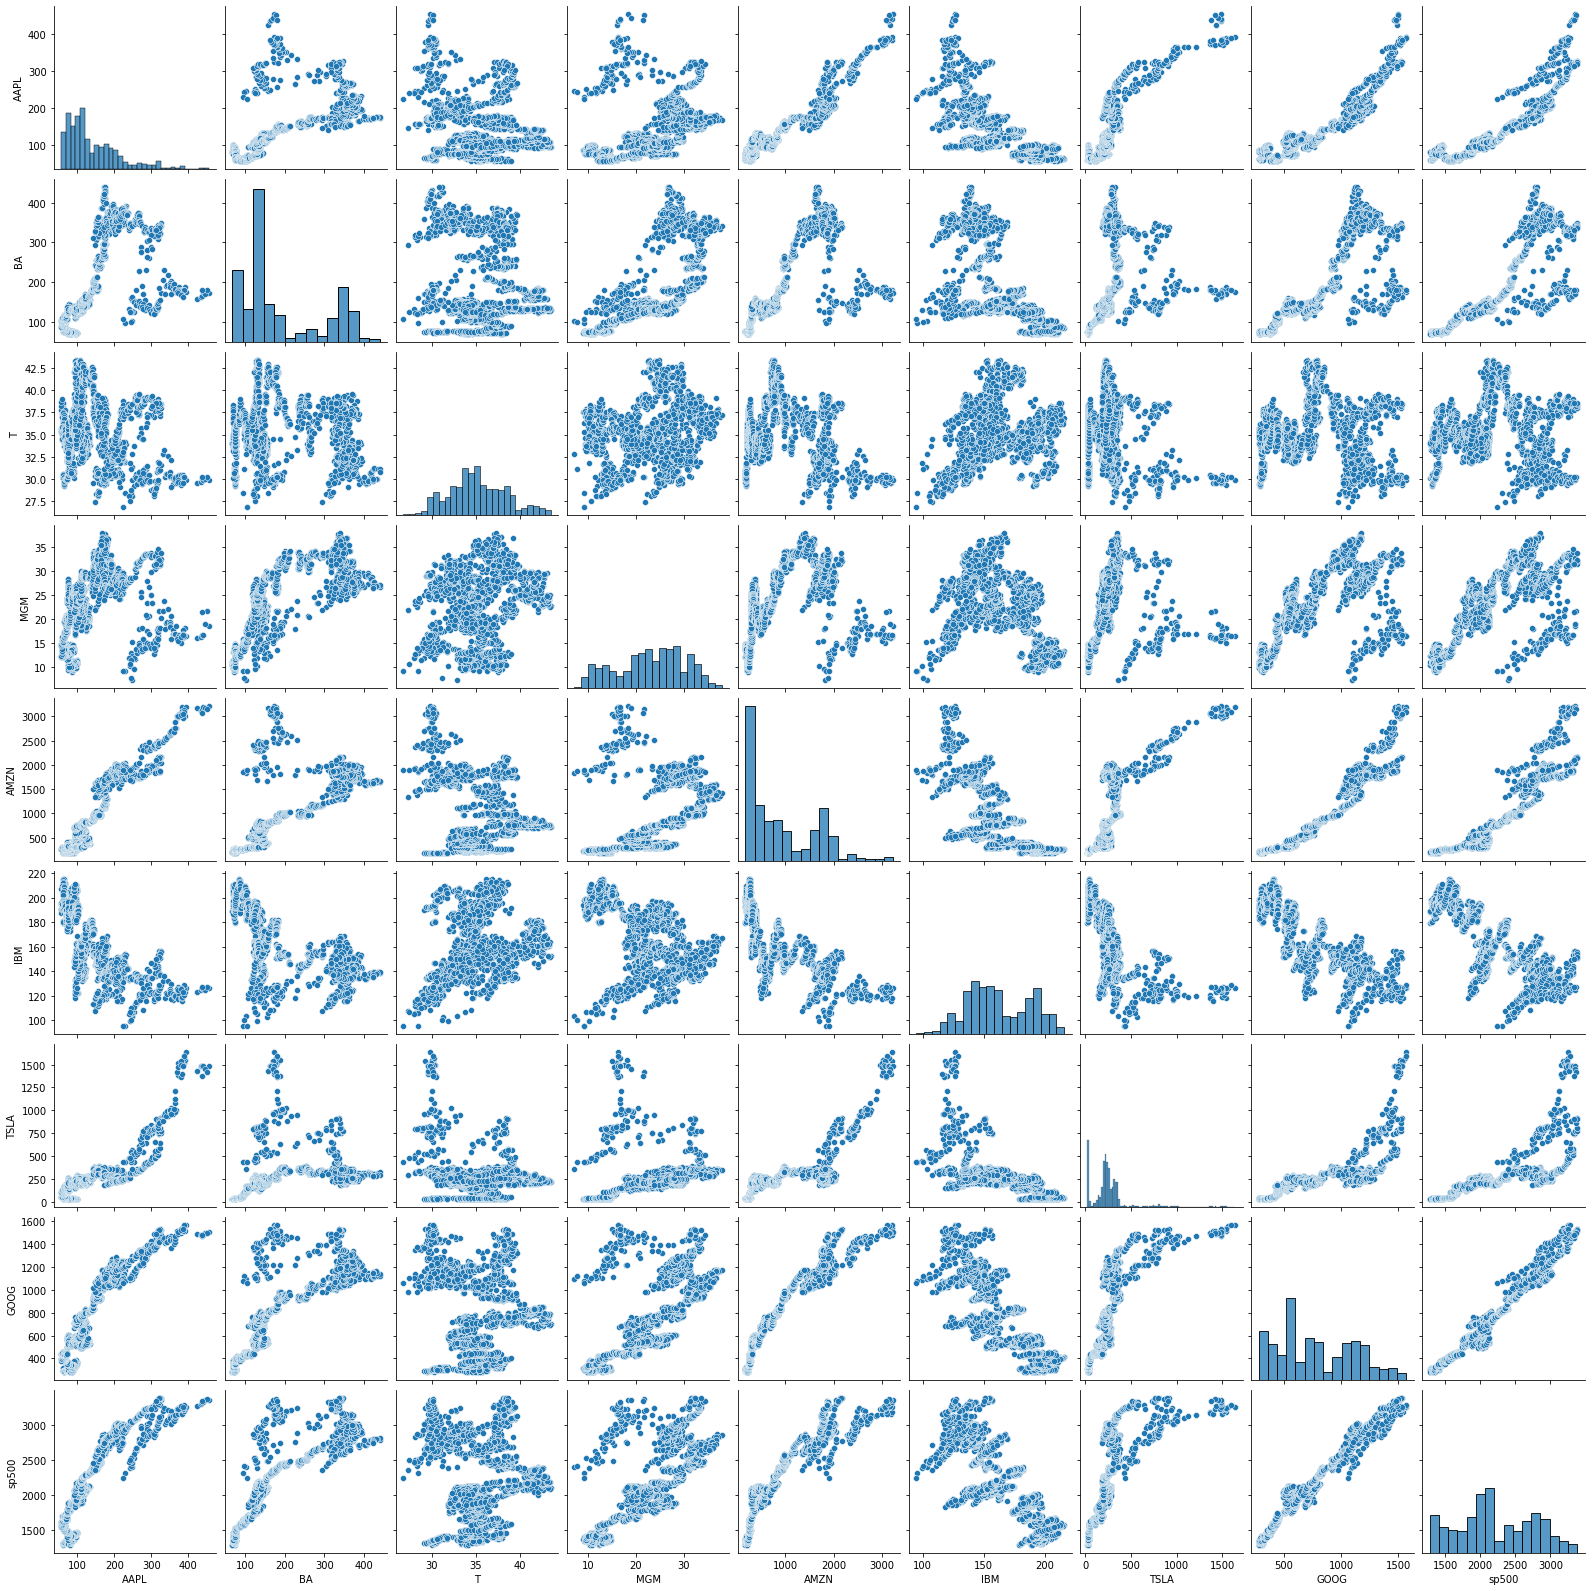

In [148]:
sns.pairplot(df)

###From the above pairplot we can easily see that companies such as 'T', 'IBM',  'MGM' are following a gaussian distribution whereas rest of the companies stock price is rightly skwed.

##Now lets see where there is any correlation between these stock price of different companies or they are independent from each other.

In [149]:
df_corr=df.corr()

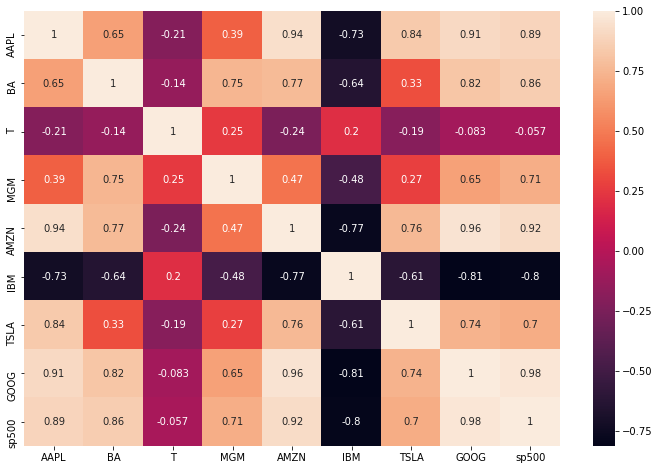

In [150]:
sns.heatmap(df_corr,annot=True)

so here we can see that 'GOOG' , 'TSLA' and 'sp500' are **highly positively corelated  morethan 80%** which gives us a sense that there might me any relation with their stock prices.


Also 'IBM' is **highly negatively Correlated morethan 80%** with the 'sp500' which means if we decrease one the it will result in increasing of other stock price.

We can see an intresting trend with 'IBM' company is negatively correlated with rest of the Companies which give us an insight that IBM has **lot of Competitors**.

#Anylasing the stocks of each company yearly

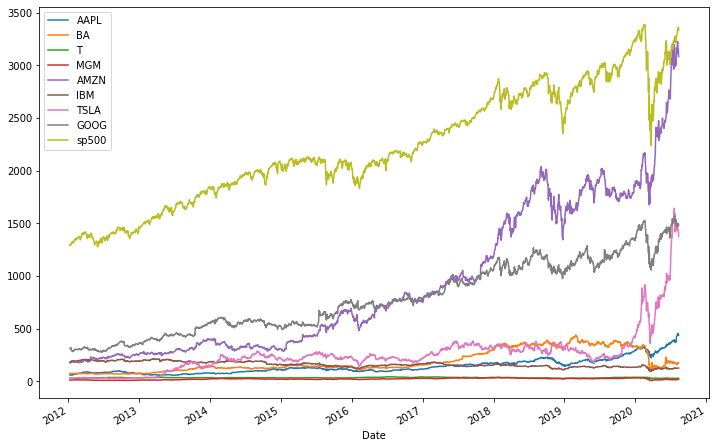

In [151]:
df.plot(figsize=(12,8))

###So we can see that the 'AMZN' stock prices is increasing rapidly along with 'sp500' as the top.

#'IBM' Stock analysis for monthly , weekly as well as daily stock prices.

In [152]:
df['IBM_week'] = df.IBM.rolling(7).mean().shift()
df['IBM_month'] = df.IBM.rolling(30).mean()

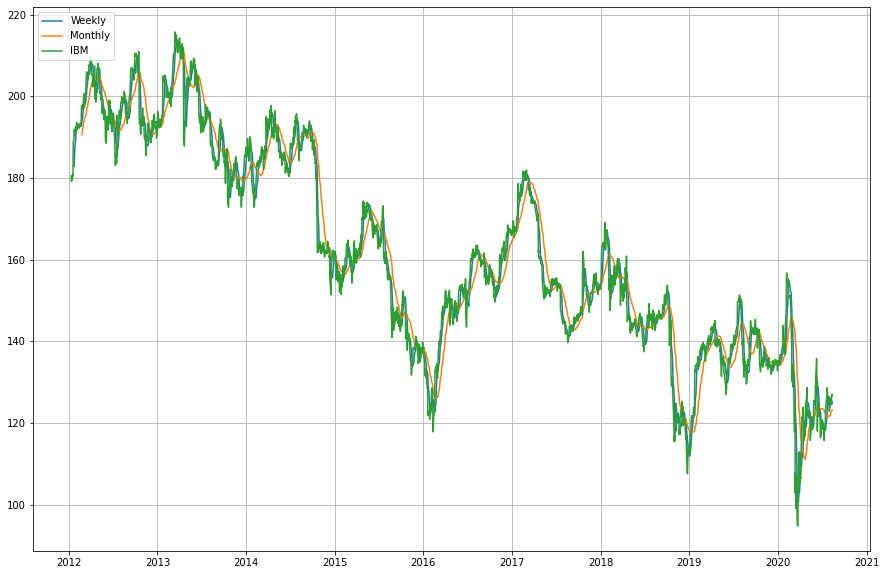

In [153]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['IBM_week'],label='Weekly')
plt.plot(df['IBM_month'], label='Monthly')
plt.plot(df['IBM'],label='IBM')
plt.legend(loc=2)

In [154]:
['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500']

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500']

#Anylasis for 'GOOG'

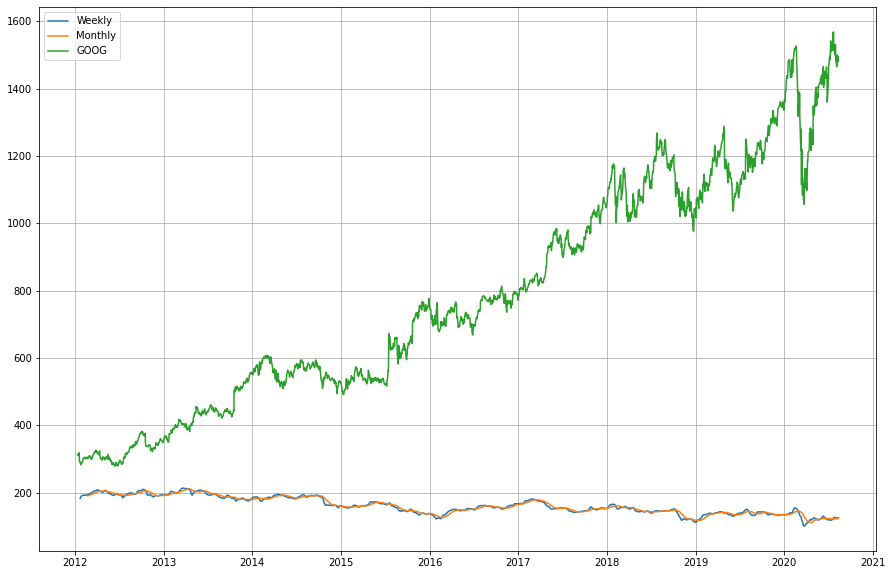

In [155]:
df['GOOG_week'] = df.IBM.rolling(7).mean()
df['GOOG_month'] = df.IBM.rolling(30).mean()
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['GOOG_week'],label='Weekly')
plt.plot(df['GOOG_month'], label='Monthly')
plt.plot(df['GOOG'],label='GOOG')
plt.legend(loc=2)

#ANLAYSIS FOR 'AAPL'

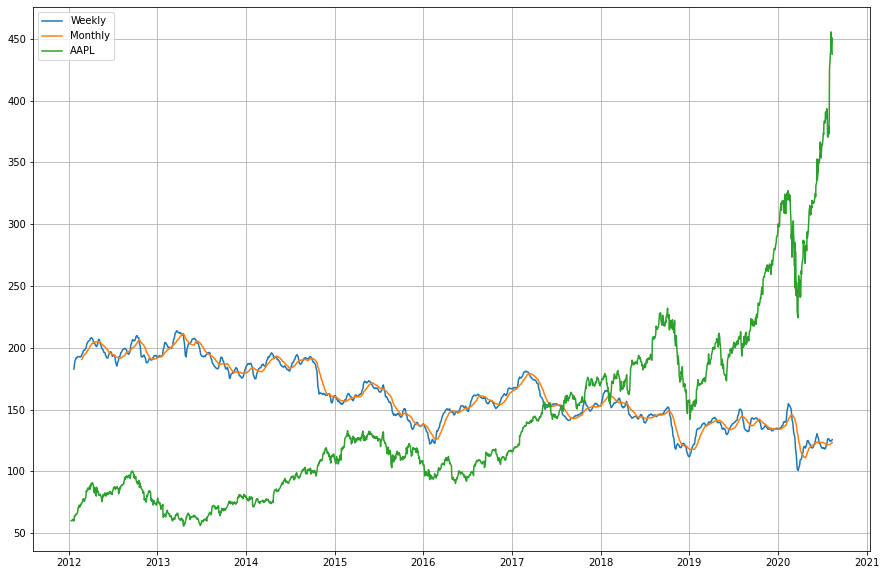

In [156]:
df['AAPL_week'] = df.IBM.rolling(7).mean()
df['AAPL_month'] = df.IBM.rolling(30).mean()
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['AAPL_week'],label='Weekly')
plt.plot(df['AAPL_month'], label='Monthly')
plt.plot(df['AAPL'],label='AAPL')
plt.legend(loc=2)

#ANLAYSIS FOR 'AMZN'

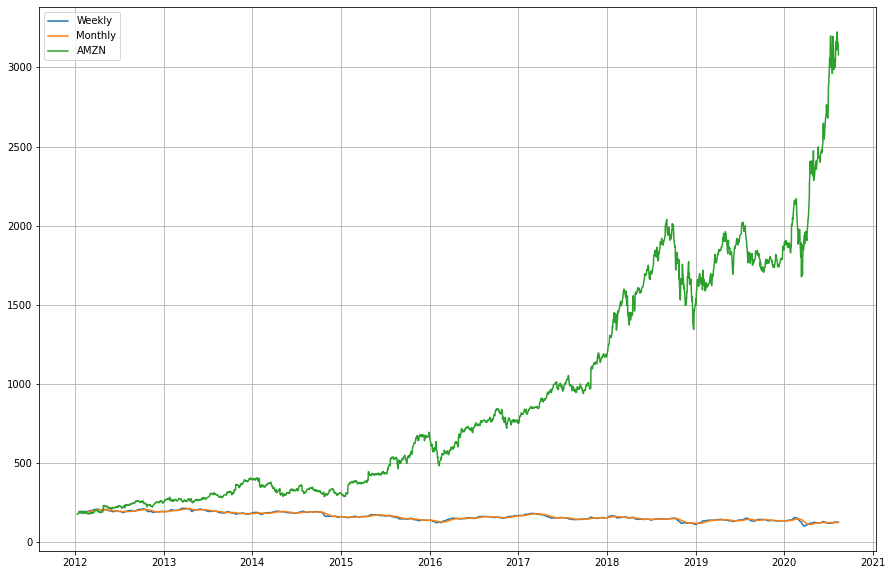

In [157]:
df['AMZN_week'] = df.IBM.rolling(7).mean()
df['AMZN_month'] = df.IBM.rolling(30).mean()
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['AMZN_week'],label='Weekly')
plt.plot(df['AMZN_month'], label='Monthly')
plt.plot(df['AMZN'],label='AMZN')
plt.legend(loc=2)

#ANALYSIS FOR sp500

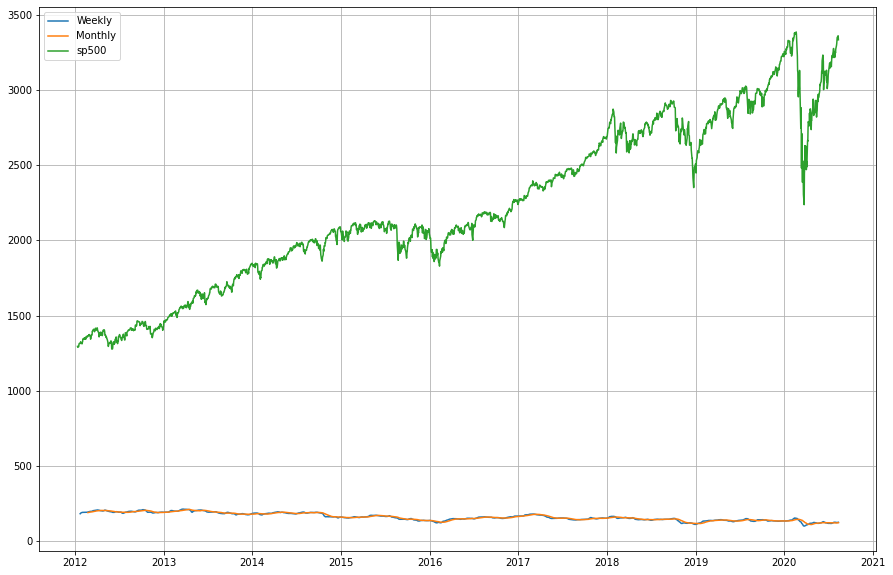

In [158]:
df['sp500_week'] = df.IBM.rolling(7).mean()
df['sp500_month'] = df.IBM.rolling(30).mean()
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['sp500_week'],label='Weekly')
plt.plot(df['sp500_month'], label='Monthly')
plt.plot(df['sp500'],label='sp500')
plt.legend(loc=2)

#Analysis for 'MGM'

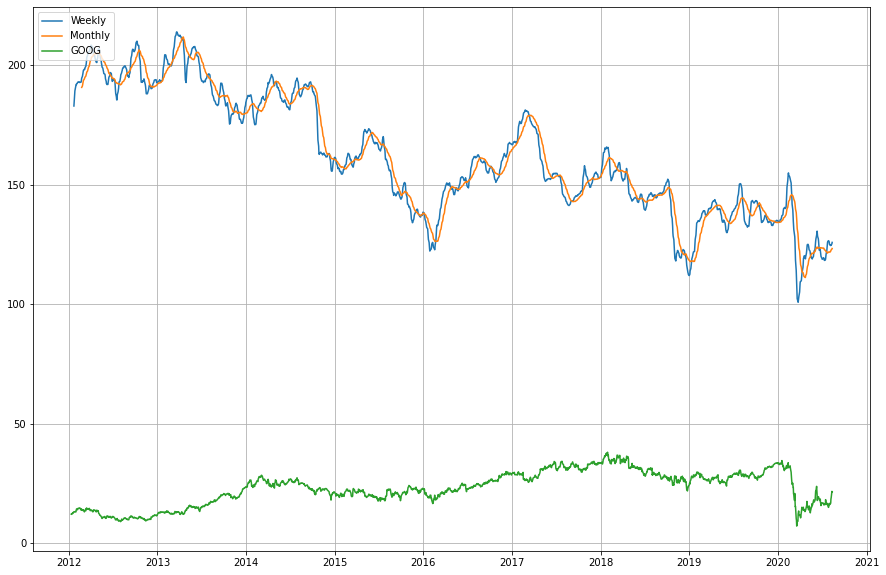

In [159]:
df['MGM_week'] = df.IBM.rolling(7).mean()
df['MGM_month'] = df.IBM.rolling(30).mean()
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['MGM_week'],label='Weekly')
plt.plot(df['MGM_month'], label='Monthly')
plt.plot(df['MGM'],label='GOOG')
plt.legend(loc=2)

#Checking for the Stationarity

#ADF STASTICAL TEST

In [160]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [161]:
adf_test(df['AMZN'])

1. ADF :  2.427589890463724
2. P-Value :  0.9990227078081413
3. Num Of Lags :  25
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2133
5. Critical Values :
	 1% :  -3.433419473570619
	 5% :  -2.862895974588963
	 10% :  -2.5674918550982277


####So it is clear that the stock price for 'AMZN' is non stationary since p-value is larger than .05

#KPSS test

In [162]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
  print ('Results of KPSS Test:')
  kpsstest = kpss(timeseries, regression='c')
  kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
  for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
  print (kpss_output)

In [163]:
kpss_test(df['AMZN'])

Results of KPSS Test:
Test Statistic            7.283334
p-value                   0.010000
Lags Used                26.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Now here is the catch there are different types of stationarity in the timeseries data.
* ADF-->adf test has an alternate hypothesis of linear or difference stationary
* KPSS-->KPSS test identifies trend-stationarity in a series

Let us understand the different types of stationarities and how to interpret the results of the above tests.

**Strict Stationary:** A strict stationary series satisfies the mathematical definition of a stationary process. For a strict stationary series, the mean, variance and covariance are not the function of time. The aim is to convert a non-stationary series into a strict stationary series for making predictions.

**Trend Stationary:** A series that has no unit root but exhibits a trend is referred to as a trend stationary series. Once the trend is removed, the resulting series will be strict stationary. The KPSS test classifies a series as stationary on the absence of unit root. This means that the series can be strict stationary or trend stationary.

Difference Stationary: A time series that can be made strict stationary by differencing falls under difference stationary. ADF test is also known as a difference stationarity test.

It’s always better to apply both the tests, so that we are sure that the series is truly stationary. Let us look at the possible outcomes of applying these stationary tests.

* Case 1: Both tests conclude that the series is not stationary -> series is not stationary
* Case 2: Both tests conclude that the series is stationary -> series is stationary
* Case 3: KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary
* Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary

###so for our case we its CSAE 3 Our data is trend stationary and in order to make it strict stationary we need to remove the trend.

#Checking for White Noise

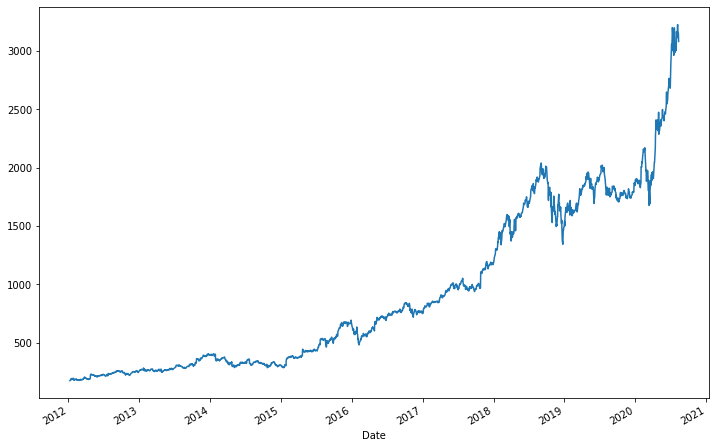

In [164]:
df['AMZN'].plot(figsize=(12,8))

###NO white noise since the mean  and variance is not same.

#APPLYING DIFFERENCE

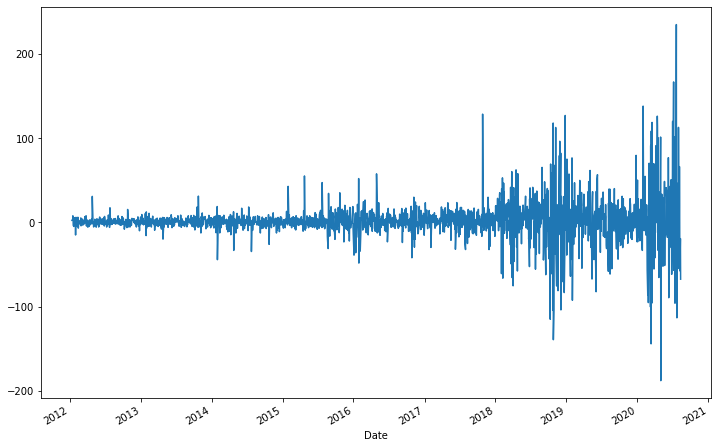

In [165]:
df['AMZN_diff'] = df['AMZN'] - df['AMZN'].shift(1)
df.dropna(subset = ['AMZN_diff'],inplace=True)
df['AMZN_diff'].plot(figsize=(12,8))

###Since variance is still not constant so we will try some other techiniques for transforming it to stationarity .

#APPLYING LOG Transformation

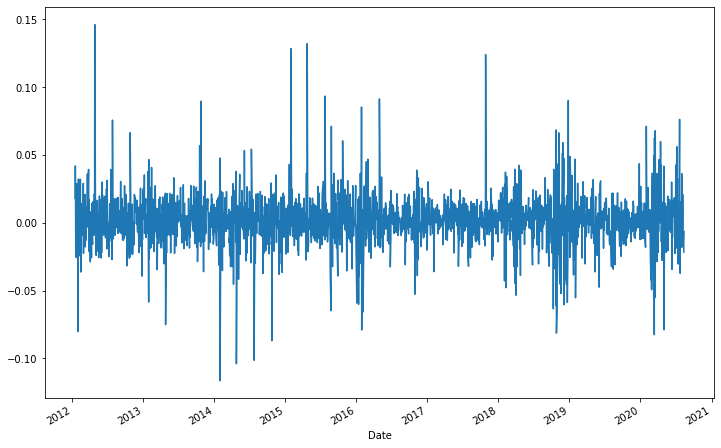

In [166]:
df['AMZN_log'] = np.log(df['AMZN'])
df['AMZN_log_difference']  = df['AMZN_log']  - df['AMZN_log'].shift(1)
df.dropna(subset = ['AMZN_log_difference'],inplace=True)
df['AMZN_log_difference'].plot(figsize=(12,8))

###Hmm,so we can see there is an improvement in the dataset and there is no trend which you can see.

#Trying Other transformations

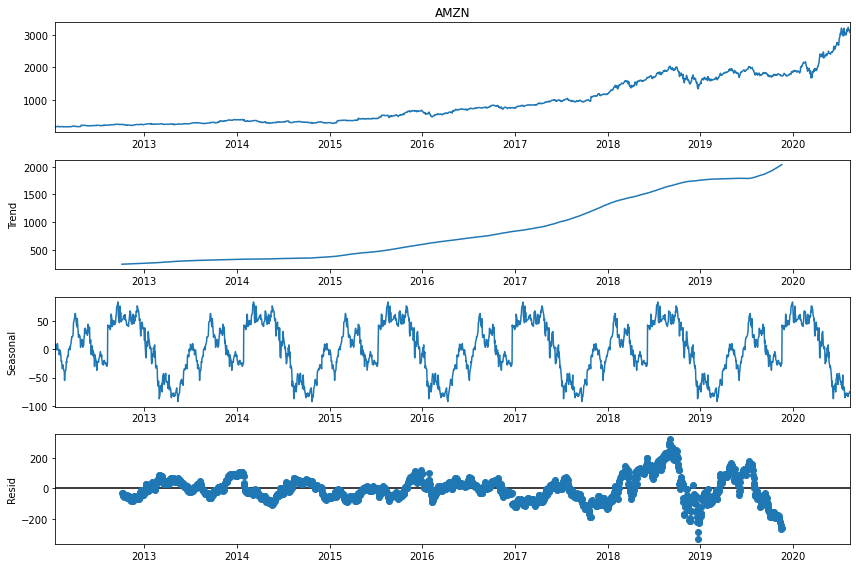

In [167]:
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(df['AMZN'],period=366)
results.plot();

In [168]:
adf_test(df['AMZN_diff'])

1. ADF :  -9.257331033787137
2. P-Value :  1.4378843385595199e-15
3. Num Of Lags :  24
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2132
5. Critical Values :
	 1% :  -3.4334209150252
	 5% :  -2.8628966110401337
	 10% :  -2.5674921939691435


In [169]:
kpss_test(df['AMZN_diff'])

Results of KPSS Test:
Test Statistic            0.587865
p-value                   0.023740
Lags Used                26.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


#Ploting the ACF FOR 'AMZN'

In [170]:
#ACF and PACF plots:
import statsmodels
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

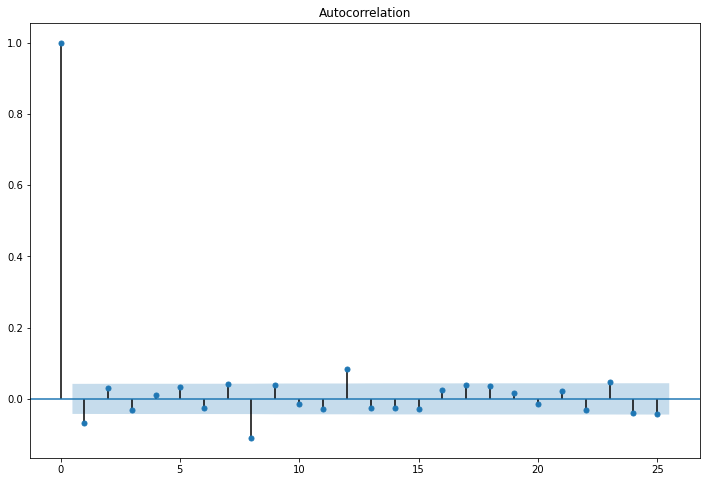

In [171]:
acf=statsmodels.graphics.tsaplots.plot_acf(df['AMZN_diff'],lags=25)

#Ploting for PACF

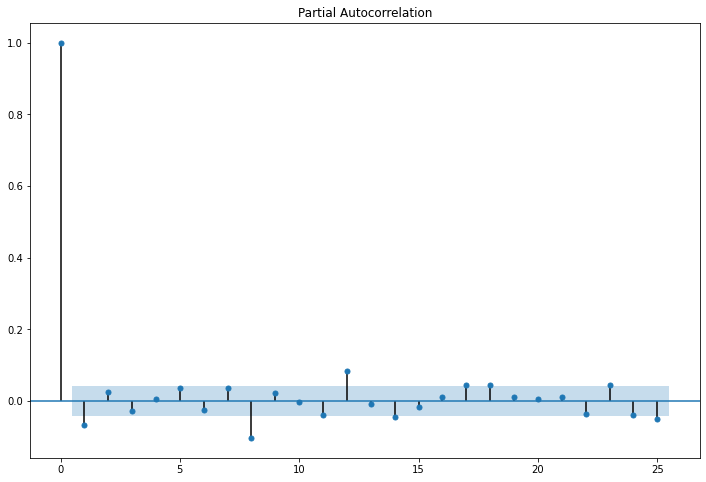

In [172]:
pacf=statsmodels.graphics.tsaplots.plot_pacf(df['AMZN_diff'],lags=25)

#Applying ARIMA

###Figuring out the Order of the Arima

In [173]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['AMZN_diff'],trace=True ,
                          suppress_warnings=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21292.571, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20531.148, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21290.574, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=20301.557, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=20144.629, Time=0.32 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=20025.748, Time=0.48 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=19986.098, Time=0.60 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.88 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.78 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=19984.105, Time=0.27 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=20023.757, Time=0.23 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=1.51 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Ti

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2157
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -9986.053
Date:                Wed, 30 Jun 2021   AIC                          19984.105
Time:                        12:12:08   BIC                          20018.161
Sample:                             0   HQIC                         19996.563
                               - 2157                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9019      0.010    -86.267      0.000      -0.922      -0.881
ar.L2         -0.6961      0.014    -51.344      0.000      -0.723      -0.669
ar.L3         -0.5456      0.016    -34.225      0.000      -0.577      -0.514
ar.L4         -0.3562      0.015    -24.004      0.000      -0.385      -0.327
ar.L5         -0.1391      0.011    -12.689      0.000      -0.161      -0.118
sigma2       618.5011      6.199     99.779      0.000     606.352     630.650
===================================================================================
Ljung-Box (L1) (Q):                   1.29   Jarque-Bera (JB):             28478.29
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):              45.35   Skew:                             0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [174]:
from statsmodels.tsa.arima_model import ARIMA

##SPILTING THE DATA INTO TRAINING AND TESTING

In [175]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(2157, 24)
(2127, 24) (30, 24)


In [176]:
test['AMZN_diff'].head()

Date
2020-06-30     78.440185
2020-07-01    119.879883
2020-07-02     11.600098
2020-07-06    166.739990
2020-07-07    -56.919922
Name: AMZN_diff, dtype: float64

##Training the model

In [177]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['AMZN_diff'],order=(5,1,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.AMZN_diff   No. Observations:                 2126
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9656.790
Method:                       css-mle   S.D. of innovations             22.715
Date:                Wed, 30 Jun 2021   AIC                          19327.580
Time:                        12:12:09   BIC                          19367.214
Sample:                             1   HQIC                         19342.087
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0073      0.135     -0.054      0.957      -0.271       0.256
ar.L1.D.AMZN_diff    -0.9091      0.022    -42.250      0.000      -0.951      -0.867
ar.L2.D.AMZN_diff    -0.7166      0.028    -25.476      0.000      -0.772      -0.661
ar.L3.D.AMZN_diff    -0.5406      0.030    -18.061      0.000      -0.599      -0.482
ar.L4.D.AMZN_diff    -0.3705      0.028    -13.154      0.000      -0.426      -0.315
ar.L5.D.AMZN_diff    -0.1263      0.022     -5.849      0.000      -0.169      -0.084
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4729           -1.2730j            1.3580           -0.1934
AR.2            0.4729           +1.2730j            1.3580            0.1934
AR.3           -1.0286           -1.1396j            1.5352           -0.3669
AR.4           -1.0286           +1.1396j            1.5352            0.3669
AR.5           -1.8214           -0.0000j            1.8214           -0.5000
-----------------------------------------------------------------------------
"""

##Making prediction on Test set

In [178]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.index=df.index[start:end+1]
print(pred)

Date
2020-06-30     2.658024
2020-07-01   -10.553671
2020-07-02   -12.035378
2020-07-06   -17.327442
2020-07-07   -16.168442
2020-07-08    -9.674453
2020-07-09   -11.356914
2020-07-10   -12.986684
2020-07-13   -13.597871
2020-07-14   -13.543906
2020-07-15   -12.497773
2020-07-16   -12.367637
2020-07-17   -12.859357
2020-07-20   -13.040792
2020-07-21   -13.015082
2020-07-22   -12.849833
2020-07-23   -12.781537
2020-07-24   -12.873482
2020-07-27   -12.941645
2020-07-28   -12.942047
2020-07-29   -12.916173
2020-07-30   -12.903989
2020-07-31   -12.923391
2020-08-03   -12.946580
2020-08-04   -12.954585
2020-08-05   -12.954851
2020-08-06   -12.957556
2020-08-07   -12.966405
2020-08-10   -12.977251
2020-08-11   -12.985346
Name: ARIMA predictions, dtype: float64


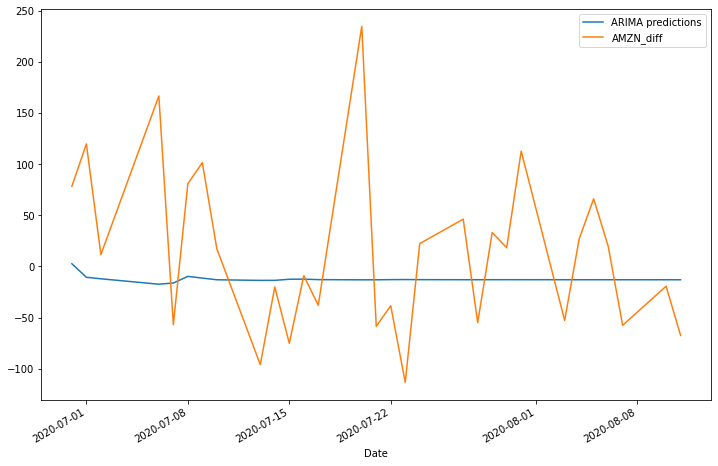

In [179]:
pred.plot(legend=True)
test['AMZN_diff'].plot(legend=True)

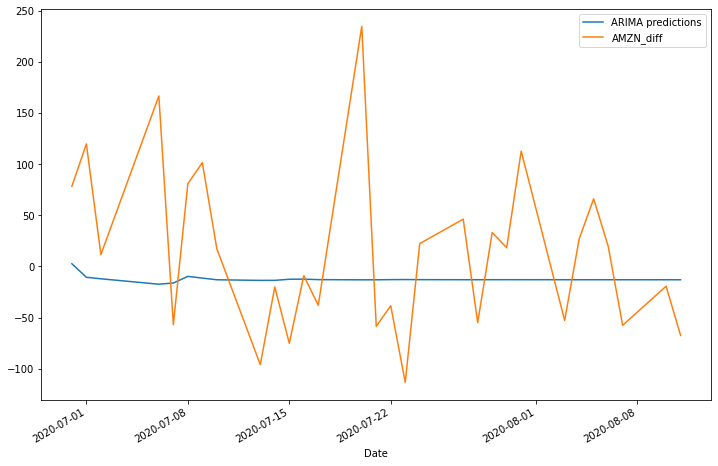

In [180]:
pred.plot(legend='ARIMA Predictions')
test['AMZN_diff'].plot(legend=True)

In [181]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AMZN_diff']))
print(rmse)

83.14252428490643


####Model is performing bad we need to improve the transformations

#Applying Machine Learning Algorithms

###Creating the independent features For the 'AMZN' company

In [182]:
df['AMZN_LastMonth']=df['AMZN'].shift(22)#cause we are not considering the weekends
df['AMZN_2Monthsback']=df['AMZN'].shift(44)
df['AMZN_1dayback']=df['AMZN'].shift(1)
df['AMZN_1weekback']=df['AMZN'].shift(5)
df.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,IBM_week,IBM_month,GOOG_week,GOOG_month,AAPL_week,AAPL_month,AMZN_week,AMZN_month,sp500_week,sp500_month,MGM_week,MGM_month,AMZN_diff,AMZN_log,AMZN_log_difference,AMZN_LastMonth,AMZN_2Monthsback,AMZN_1dayback,AMZN_1weekback
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-17,60.671429,75.239998,30.25,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.240006,5.202137,0.017997,NaN,NaN,NaN,NaN
2012-01-18,61.301430,75.059998,30.33,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.779998,5.244072,0.041936,NaN,NaN,181.660004,NaN
2012-01-19,61.107143,75.559998,30.42,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.009995,5.270175,0.026103,NaN,NaN,189.440002,NaN
2012-01-20,60.042858,75.519997,30.51,12.64,190.929993,188.520004,26.600000,291.900879,1315.380005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.520004,5.251907,-0.018268,NaN,NaN,194.449997,NaN
2012-01-23,61.058571,75.510002,30.40,13.14,186.089996,189.979996,26.770000,291.666748,1316.000000,NaN,NaN,182.828574,NaN,182.828574,NaN,182.828574,NaN,182.828574,NaN,182.828574,NaN,-4.839997,5.226230,-0.025676,NaN,NaN,190.929993,NaN


In [183]:
df.columns

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500',
       'IBM_week', 'IBM_month', 'GOOG_week', 'GOOG_month', 'AAPL_week',
       'AAPL_month', 'AMZN_week', 'AMZN_month', 'sp500_week', 'sp500_month',
       'MGM_week', 'MGM_month', 'AMZN_diff', 'AMZN_log', 'AMZN_log_difference',
       'AMZN_LastMonth', 'AMZN_2Monthsback', 'AMZN_1dayback',
       'AMZN_1weekback'],
      dtype='object')

In [184]:
Amazon=df.drop(columns=['AAPL', 'BA', 'T', 'MGM', 'IBM', 'TSLA', 'GOOG', 'sp500',
       'IBM_week', 'IBM_month', 'GOOG_week', 'GOOG_month', 'AAPL_week',
       'AAPL_month', 'AMZN_week', 'AMZN_month', 'sp500_week', 'sp500_month',
       'MGM_week', 'MGM_month', 'AMZN_diff', 'AMZN_log', 'AMZN_log_difference'])

In [185]:
Amazon.head()

,AMZN,AMZN_LastMonth,AMZN_2Monthsback,AMZN_1dayback,AMZN_1weekback
Date,,,,,
2012-01-17,181.660004,NaN,NaN,NaN,NaN
2012-01-18,189.440002,NaN,NaN,181.660004,NaN
2012-01-19,194.449997,NaN,NaN,189.440002,NaN
2012-01-20,190.929993,NaN,NaN,194.449997,NaN
2012-01-23,186.089996,NaN,NaN,190.929993,NaN


In [186]:
Amazon=Amazon.dropna()
Amazon.head()

,AMZN,AMZN_LastMonth,AMZN_2Monthsback,AMZN_1dayback,AMZN_1weekback
Date,,,,,
2012-03-20,192.330002,179.929993,181.660004,185.520004,184.589996
2012-03-21,191.729996,182.500000,189.440002,192.330002,182.259995
2012-03-22,192.399994,182.259995,194.449997,191.729996,184.429993
2012-03-23,195.039993,180.580002,190.929993,192.399994,185.050003
2012-03-26,202.869995,178.889999,186.089996,195.039993,185.520004


#Predicting Using Simple Linear Regression

In [187]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [188]:
from sklearn.model_selection import train_test_split
X=Amazon.drop(['AMZN'],axis=1)
y=Amazon['AMZN']

In [189]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
lin_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [190]:
lin_pred=lin_model.predict(X_test)

In [191]:
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (12,8)
#plt.plot(lin_pred,label='Linear_Regression_Predictions')
#plt.plot(y_test,label='Actual Sales')
#plt.legend(loc="upper left")


#Predection Using Random Forest

In [192]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=4, random_state=1)

In [193]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [194]:
pred=model.predict(X_test)

In [195]:
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (12,8)
#plt.plot(lin_pred,label='Linear_Regression_Predictions')
#plt.plot(y_test,label='Actual Sales')
#plt.legend(loc="upper left")


#Checking the performance of the Both algorithm

In [196]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [197]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 25.833480972756718
Mean Squared Error for Linear Regression Model is: 23.633109349029503


####Linear regression is performing better than Random forest